In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import numpy as np
import matplotlib

In [ ]:
data = pd.read_csv('C:/Users/Ceiec04/Desktop/Prediccion_Alertas_Alimentarias/Datasets/full_RASFF_DATA_20072020.csv', sep=';', 
                   header=0, index_col = 0)

# Preprocesamiento

In [5]:
origen_not = []
rel_not = []
dest_not = []
ori_dest_not = []
ori_rel_not = []
dest_rel_not = []
for index, row in data.iterrows():
    if row['NOT_COUNTRY'] in row['COUNT_ORIGEN'] and row['NOT_COUNTRY'] in row['COUNT_DESTIN']:
        ori_dest_not.append(row['NOT_COUNTRY'])
        
    if row['NOT_COUNTRY'] in row['COUNT_ORIGEN'] and row['NOT_COUNTRY'] not in row['COUNT_DESTIN']:
        origen_not.append(row['NOT_COUNTRY'])
    
    if row['NOT_COUNTRY'] in row['COUNT_DESTIN'] and row['NOT_COUNTRY'] not in row['COUNT_ORIGEN']:
        dest_not.append(row['NOT_COUNTRY'])
        
    if row['NOT_COUNTRY'] in row['COUNT_CONCERN']:
        rel_not.append(row['NOT_COUNTRY'])
    
    if row['NOT_COUNTRY'] in row['COUNT_CONCERN'] and row['NOT_COUNTRY'] in row['COUNT_ORIGEN']:
        ori_rel_not.append(row['NOT_COUNTRY'])
        
    if row['NOT_COUNTRY'] in row['COUNT_CONCERN'] and row['NOT_COUNTRY'] in row['COUNT_DESTIN']:
        dest_rel_not.append(row['NOT_COUNTRY'])        

# Diagramas de barras de los paises notificantes

## Origen y notificante

In [9]:
count = Counter(origen_not)
table = pd.DataFrame(list(count.items()))
table = table.sort_values(by=[1], ascending = False)
table

,0,1
2,France,256
4,Netherlands,247
5,Germany,229
0,Belgium,215
8,Italy,171
3,United Kingdom,160
11,Denmark,90
1,Poland,57
9,Spain,53
14,Ireland,38


In [ ]:
barras_comb = {}

In [10]:
barras_comb['notifier_origin'] = table[1].sum()

In [11]:
table = table.iloc[:5]
table

,0,1
2,France,256
4,Netherlands,247
5,Germany,229
0,Belgium,215
8,Italy,171


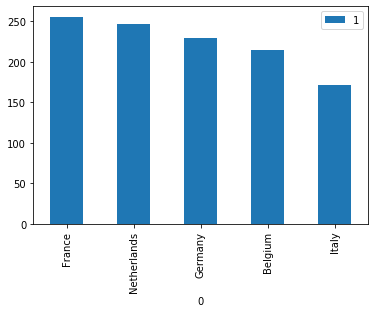

In [12]:
ax = table.plot.bar(x=0, y=1)

## Relacionado y notificante

In [13]:
count = Counter(rel_not)
table = pd.DataFrame(list(count.items()))
table = table.sort_values(by=[1], ascending = False)
table

,0,1
7,Italy,4781
6,United Kingdom,4127
3,Germany,3853
9,Spain,3695
2,Netherlands,2818
0,France,1522
12,Greece,1490
1,Poland,1103
5,Belgium,931
4,Bulgaria,816


In [14]:
barras_comb['notifier_concern'] = table[1].sum()

In [15]:
table = table.iloc[:5]
table

,0,1
7,Italy,4781
6,United Kingdom,4127
3,Germany,3853
9,Spain,3695
2,Netherlands,2818


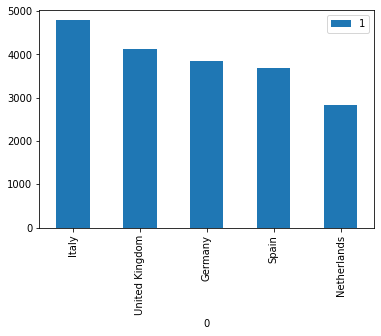

In [16]:
ax = table.plot.bar(x=0, y=1)

## Destino y notificante

In [18]:
count = Counter(dest_not)
table = pd.DataFrame(list(count.items()))
table = table.sort_values(by=[1], ascending = False)
table

,0,1
7,Italy,3553
10,Germany,3006
15,United Kingdom,1414
1,Denmark,1264
0,France,1151
5,Netherlands,1100
13,Belgium,904
12,Czech Republic,832
6,Sweden,773
4,Finland,732


In [19]:
barras_comb['notifier_destination'] = table[1].sum()

In [20]:
table = table.iloc[:5]
table

,0,1
7,Italy,3553
10,Germany,3006
15,United Kingdom,1414
1,Denmark,1264
0,France,1151


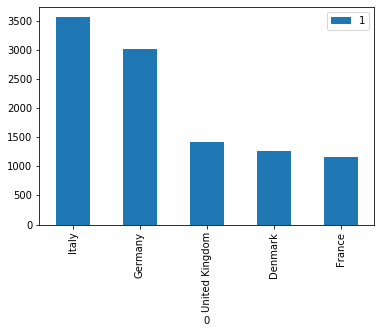

In [21]:
ax = table.plot.bar(x=0, y=1)

## Origen,destino y notificante

In [22]:
count = Counter(ori_dest_not)
table = pd.DataFrame(list(count.items()))
table = table.sort_values(by=[1], ascending = False)
table

,0,1
2,Germany,613
1,Italy,601
4,France,475
7,United Kingdom,359
8,Belgium,312
0,Poland,277
3,Spain,265
10,Netherlands,190
6,Denmark,130
16,Austria,105


In [23]:
barras_comb['notifier_origin_destination'] = table[1].sum()

In [24]:
table = table.iloc[:5]
table

,0,1
2,Germany,613
1,Italy,601
4,France,475
7,United Kingdom,359
8,Belgium,312


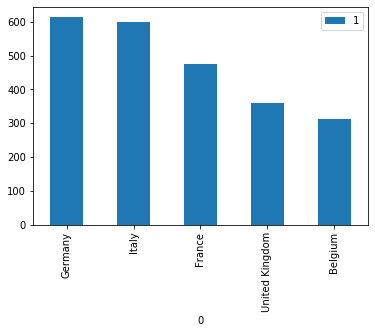

In [25]:
ax = table.plot.bar(x=0, y=1)

# Pie chart y diagrama de barras de los roles de los paises notificantes

In [28]:
barras_comb['Unknown'] = 30
D = barras_comb

In [29]:
D

{'notifier_origin': 1702,
 'notifier_concern': 30012,
 'notifier_destination': 20624,
 'notifier_origin_destination': 3983,
 'Unknown': 30}

In [30]:
sum(D.values())

56351

In [31]:
size_not_ori = D['notifier_origin']/56351*100
size_not_con = D['notifier_concern']/56351*100
size_not_des = D['notifier_destination']/56351*100
size_not_ori_des = D['notifier_origin_destination']/56351*100
size_unknown = D['Unknown']/56351*100

In [32]:
print(size_not_ori,size_not_con,size_not_des,size_not_ori_des,size_unknown)

3.020354563361786 53.25903710670619 36.59917304040744 7.068197547514685 0.05323774200990222


In [33]:
size_unknown = size_unknown + 0.2

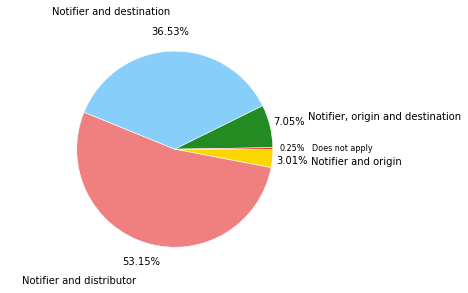

In [34]:
explode = (0.0, 0.0,  0.0,  0.0, 0.1)
labels = 'Notifier and origin', 'Notifier and distributor', 'Notifier and destination', 'Notifier, origin and destination','Does not apply'
sizes = [size_not_ori, size_not_con, size_not_des,size_not_ori_des,size_unknown]
colors = ['gold', 'lightcoral', 'lightskyblue', 'forestgreen','r']
# Plot
patches, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=False,pctdistance = 1.2,labeldistance  = 1.4, counterclock = False,
        wedgeprops = {'linewidth': 0.6, 'joinstyle':'round', 'edgecolor':'white'})
texts[4].set_fontsize(8)
autotexts[4].set_fontsize(8)
texts[0].set_fontsize(10)
autotexts[0].set_fontsize(10)
plt.axis('equal')
plt.savefig("pie_chart.png", format = "png", dpi = 400, bbox_inches='tight')
plt.show()

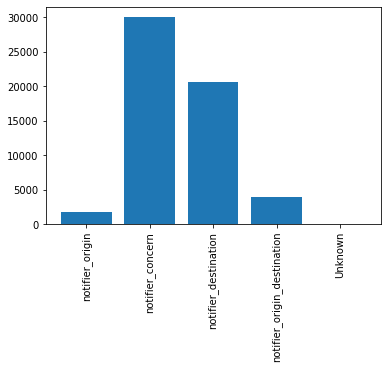

In [35]:
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
plt.show()

# Analisis de los origenes,destinos,notificantes,relacionados, productos y contaminantes

In [36]:
origenes = []
destinos = []
relacionados = []
notificantes = []
contaminantes = []
productos = []

for index, row in data.iterrows():
    
    origen=row['COUNT_ORIGEN'].split(",")   
    destino=row['COUNT_DESTIN'].split(",") 
    relacionado=row['COUNT_CONCERN'].split(",")
    notificante=row['NOT_COUNTRY'].split(",")
    contaminante=row['HAZARDS_CAT'].split(",")
    producto=row['PROD_CAT'].split(",")
    
    for o in origen:
        origenes.append(o)
        
    for d in destino:
        destinos.append(d)
        
    for r in relacionado:
        relacionados.append(r)
        
    for n in notificante:
        notificantes.append(n)
        
    for c in contaminante:
        contaminantes.append(c)
        
    for p in producto:
        productos.append(p)
    

## Orígenes

In [ ]:
count = Counter(origenes)
table = pd.DataFrame(list(count.items()))
table[2] = table[1]/56351*100
table = table.sort_values(by=[1], ascending = False)
table = table.iloc[:35]

In [70]:
variance = table[1].diff()/56351*100
print(variance.to_string(index=False))

      NaN
-2.791432
-2.363756
-1.073628
-0.251992
-0.088730
-0.008873
-0.379763
-0.227148
-0.140193
-0.062111
-0.463168
-0.204078
-0.569644
-0.161488
-0.239570
-0.110025
-0.509308
-0.305230
-0.056787
-0.072758
-0.110025
-0.015971
-0.088730
-0.058562
-0.014197
-0.081631
-0.003549
-0.015971
-0.021295
-0.001775
-0.001775
-0.030168
-0.067434
-0.019521


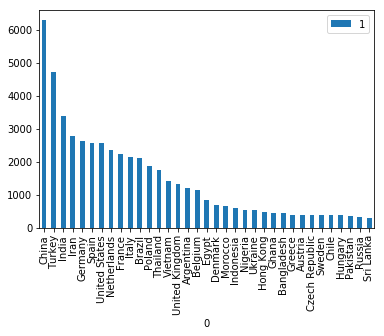

In [35]:
ax = table.plot.bar(x=0, y=1)

## Destinos

In [ ]:
count = Counter(destinos)
table = pd.DataFrame(list(count.items()))
table[2] = table[1]/56351*100
table = table.sort_values(by=[1], ascending = False)
table[0] = table[0].str.replace(' ','No country')
table[0] = table[0].str.replace('UnitedNo countryKingdom','United Kingdom')
table[0] = table[0].str.replace('CzechNo countryRepublic','Czech Republic')
table[0] = table[0].str.replace('HongNo countryKong','Hong Kong')
table[0] = table[0].str.replace('UnitedNo countryState','United States')
table = table.iloc[:35]

In [73]:
variance = table[1].diff()/56351*100
print(variance.to_string(index=False))

       NaN
-41.511242
 -1.103796
 -3.073592
 -0.876648
 -0.193430
 -0.070984
 -1.137513
 -0.298131
 -0.340722
 -0.534152
 -0.055012
 -0.322976
 -0.457845
 -0.113574
 -0.007098
 -0.012422
 -0.493336
 -0.007098
 -0.033717
 -0.014197
 -0.051463
 -0.282160
 -0.225373
 -0.007098
 -0.081631
 -0.115348
 -0.040816
 -0.060336
 -0.113574
 -0.159713
 -0.257316
 -0.044365
 -0.014197
 -0.076307


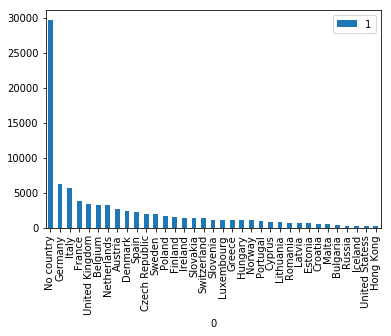

In [38]:
ax = table.plot.bar(x=0, y=1)

## Relacionados

In [ ]:
count = Counter(relacionados)
table = pd.DataFrame(list(count.items()))
table[2] = table[1]/56351*100
table = table.sort_values(by=[1], ascending = False)
table = table[table[0] != 'Commission Services']
table = table[table[0] != 'INFOSAN']
table[0] = table[0].str.replace(' ','No country')
table[0] = table[0].str.replace('UnitedNo countryKingdom','United Kingdom')
table[0] = table[0].str.replace('CzechNo countryRepublic','Czech Republic')
table[0] = table[0].str.replace('HongNo countryKong','Hong Kong')
table[0] = table[0].str.replace('UnitedNo countryState','United States')
table = table.iloc[:35]

In [67]:
variance = table[1].diff()/56351*100
print(variance.to_string(index=False))

       NaN
-16.038757
 -7.211939
 -0.695640
 -0.053238
 -1.361112
 -2.235985
 -1.982219
 -0.532377
 -0.035492
 -0.686767
 -0.117123
 -0.079857
 -0.276836
 -0.133094
 -0.008873
 -0.007098
 -0.232471
 -0.010648
 -0.076307
 -0.008873
 -0.159713
 -0.005324
 -0.019521
 -0.010648
 -0.044365
 -0.003549
 -0.040816
 -0.014197
 -0.003549
 -0.095828
 -0.023070
 -0.003549
 -0.028393
 -0.056787


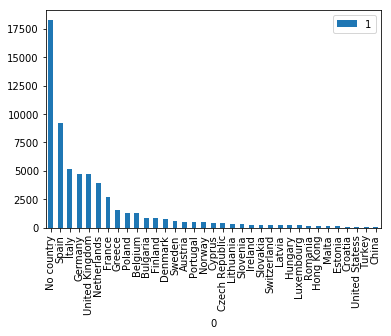

In [41]:
ax = table.plot.bar(x=0, y=1)

## Notificantes

In [ ]:
count = Counter(notificantes)
table = pd.DataFrame(list(count.items()))
table[2] = table[1]/56351*100
table = table.sort_values(by=[1], ascending = False)
table = table[table[0] != 'Commission Services']
table = table[table[0] != 'INFOSAN']
table = table.iloc[:35]

In [77]:
variance = table[1].diff()/56351*100
print(variance.to_string(index=False))

      NaN
-2.496850
-2.915654
-2.929850
-0.094053
-1.684087
-1.856223
-0.812763
-0.017746
-0.055012
-0.631755
-0.283935
-0.356693
-0.065660
-0.108250
-0.273287
-0.291033
-0.024844
-0.086955
-0.088730
-0.051463
-0.070984
-0.312328
-0.076307
-0.015971
-0.023070
-0.062111
-0.051463
-0.062111
-0.070984
-0.196980
-0.090504
-0.005324
-0.003549
 0.000000


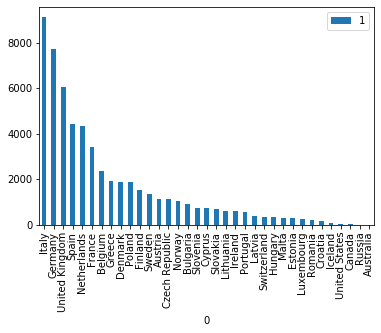

In [75]:
ax = table.plot.bar(x=0, y=1)

## Contaminantes

In [ ]:
count = Counter(contaminantes)
table = pd.DataFrame(list(count.items()))
table[2] = table[1]/56351*100
table = table.sort_values(by=[1], ascending = False)

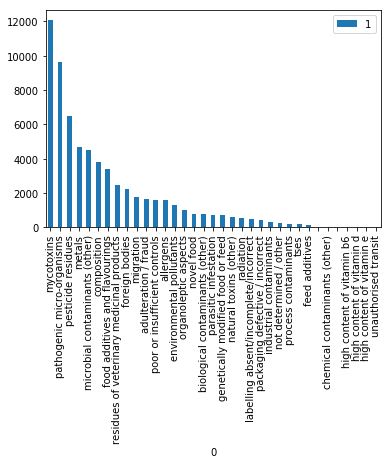

In [45]:
ax = table.plot.bar(x=0, y=1)

## Productos

In [ ]:
count = Counter(productos)
table = pd.DataFrame(list(count.items()))
table[2] = table[1]/56351*100
table = table.sort_values(by=[1], ascending = False)
table = table[table[0] != "nuts"]
table = table[table[0] != "dietetic foods"]
table = table[table[0] != "food supplements"]
table.drop(11, inplace=True)

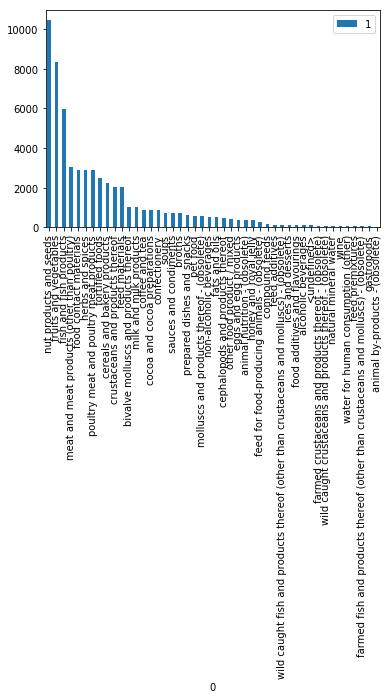

In [50]:
ax = table.plot.bar(x=0, y=1)

# Diagrama de burbuja

## Preprocesamiento para conseguir una cross-tab necesaria para el diagrama

In [ ]:
bubble_df = data[['NOT_COUNTRY','ORIG_COUNTRY']]

In [8]:
dic_conti = {}
contaminantes = []
productos = []
for index, row in bubble_df.iterrows():
    contaminante=row['ORIG_COUNTRY'].split(",")
    producto=row['NOT_COUNTRY'].split(",")
    for cont in contaminante:
        contaminantes.append(cont)
        for prod in producto:
            key = cont + '&' + prod
            if key in dic_conti:
                dic_conti[key] += 1
            else:
                dic_conti[key] = 1
    for prod in producto:
        productos.append(prod)

In [ ]:
count = Counter(contaminantes)
contaminantes_table = pd.DataFrame(list(count.items()))
contaminantes_table = contaminantes_table.sort_values(by=[1], ascending = False)

In [10]:
selected_contaminants = []
for index, rows in contaminantes_table.iterrows(): 
    selected_contaminants.append(rows[0])
selected_contaminants[:5] 

['China', 'Turkey', 'India', 'Iran', 'Germany']

In [ ]:
count = Counter(productos)
hazards_table = pd.DataFrame(list(count.items()))
hazards_table = hazards_table.sort_values(by=[1], ascending = False)

In [12]:
selected_hazards=[]
for index, rows in hazards_table.iterrows(): 
    selected_hazards.append(rows[0])
selected_hazards[:5] 

['Italy', 'Germany', 'United Kingdom', 'Netherlands', 'Spain']

In [ ]:
selected_hazards.remove('nuts')
selected_hazards.remove(' food supplements')
selected_hazards.remove(' fortified foods')

In [14]:
selected_hazards[:5] 

['Italy', 'Germany', 'United Kingdom', 'Netherlands', 'Spain']

In [ ]:
sorted_dict = sorted(dic_conti.items(), key=lambda kv: kv[1],reverse = True)

In [ ]:
sorted_dict.remove(('mycotoxins&nuts',8544))
sorted_dict.remove(('composition&dietetic foods',1493))
sorted_dict.remove(('composition& food supplements',1493))
sorted_dict.remove(('pathogenic micro-organisms&nuts',793))

In [ ]:
cont_table = pd.DataFrame.from_dict(sorted_dict)

In [19]:
cont_table10 = cont_table[:17]

,0,1
0,India&United Kingdom,1243
1,Turkey&Germany,1197
2,Spain&Italy,1182
3,China&Italy,1182
4,Iran&Germany,1077
5,Germany&Germany,904
6,Italy&Italy,805
7,France&France,788
8,China&Germany,764
9,Turkey&Bulgaria,748


In [20]:
contaminante = []
product = []
for index, row in cont_table10.iterrows():
    comb=row[0].split("&")
    contaminante.append(comb[0])
    product.append(comb[1])
cont_table10[2] = contaminante
cont_table10[3] = product

C:\Users\Ceiec04\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Ceiec04\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [22]:
cont_table10.columns = ['comb', 'value','hazard','product']

In [23]:
cont_table10

,comb,value,hazard,product
0,India&United Kingdom,1243,India,United Kingdom
1,Turkey&Germany,1197,Turkey,Germany
2,Spain&Italy,1182,Spain,Italy
3,China&Italy,1182,China,Italy
4,Iran&Germany,1077,Iran,Germany
5,Germany&Germany,904,Germany,Germany
6,Italy&Italy,805,Italy,Italy
7,France&France,788,France,France
8,China&Germany,764,China,Germany
9,Turkey&Bulgaria,748,Turkey,Bulgaria


In [24]:
data_crosstab = pd.crosstab(cont_table10['hazard'], 
                            cont_table10['product'],  
                               margins = False) 
data_crosstab

product,Belgium,Bulgaria,France,Germany,Italy,Netherlands,Spain,United Kingdom
hazard,,,,,,,,
Argentina,0,0,0,0,0,1,0,0
Belgium,1,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,1,0,0
China,0,0,0,1,1,0,1,1
France,0,0,1,0,0,0,0,0
Germany,0,0,0,1,0,0,0,0
India,0,0,0,0,0,0,0,1
Iran,0,0,0,1,0,0,0,0
Italy,0,0,0,0,1,0,0,0


In [27]:
products = list(data_crosstab.columns.values)
hazards = data_crosstab.index.values.tolist()
for p in products:
    for h in hazards:
        if data_crosstab[p][h] == 1:
            key = h+'&'+p
            value = cont_table10.loc[cont_table10['comb'] == key, 'value'] 
            data_crosstab[p][h] = value

In [28]:
data_crosstab

product,Belgium,Bulgaria,France,Germany,Italy,Netherlands,Spain,United Kingdom
hazard,,,,,,,,
Argentina,0,0,0,0,0,545,0,0
Belgium,598,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,599,0,0
China,0,0,0,764,1182,0,592,649
France,0,0,788,0,0,0,0,0
Germany,0,0,0,904,0,0,0,0
India,0,0,0,0,0,0,0,1243
Iran,0,0,0,1077,0,0,0,0
Italy,0,0,0,0,805,0,0,0


## Selección de colores

In [29]:
x1 = np.arange(1000)
np.random.shuffle(x1)
x1 = x1[:90]
C  = np.array([[0,0,0]] * 96)

In [34]:
C[0] = [200,200,200]
C[16] = [0,255,0]
C[24] = [0,0,0]
C[25] = [0,255,255]
C[34] = [255,255,255]
C[38] = [255,0,255]
C[45] = [255,255,0]
C[51] = [0,0,255]
C[56] = [100,100,100]
C[57] = [255,0,0]
C[61] = [150,100,0]
C[63] = [0,175,0]
C[66] = [0,150,150]
C[68] = [100,0,100]
C[69] = [255,69,0]
C[76] = [0,0,128]
C[82] = [255,218,185]

In [46]:
#para countries
C[5] = [200,200,200]
C[8] = [0,255,0]
C[21] = [0,0,0]
C[27] = [0,255,255]
C[28] = [255,255,255]
C[30] = [255,0,255]
C[31] = [255,255,0]
C[34] = [0,0,255]
C[43] = [100,100,100]
C[55] = [255,0,0]
C[59] = [150,100,0]
C[68] = [0,175,0]
C[76] = [0,150,150]
C[81] = [100,0,100]
C[83] = [255,69,0]
C[84] = [0,0,128]
C[95] = [255,218,185]


## Figura

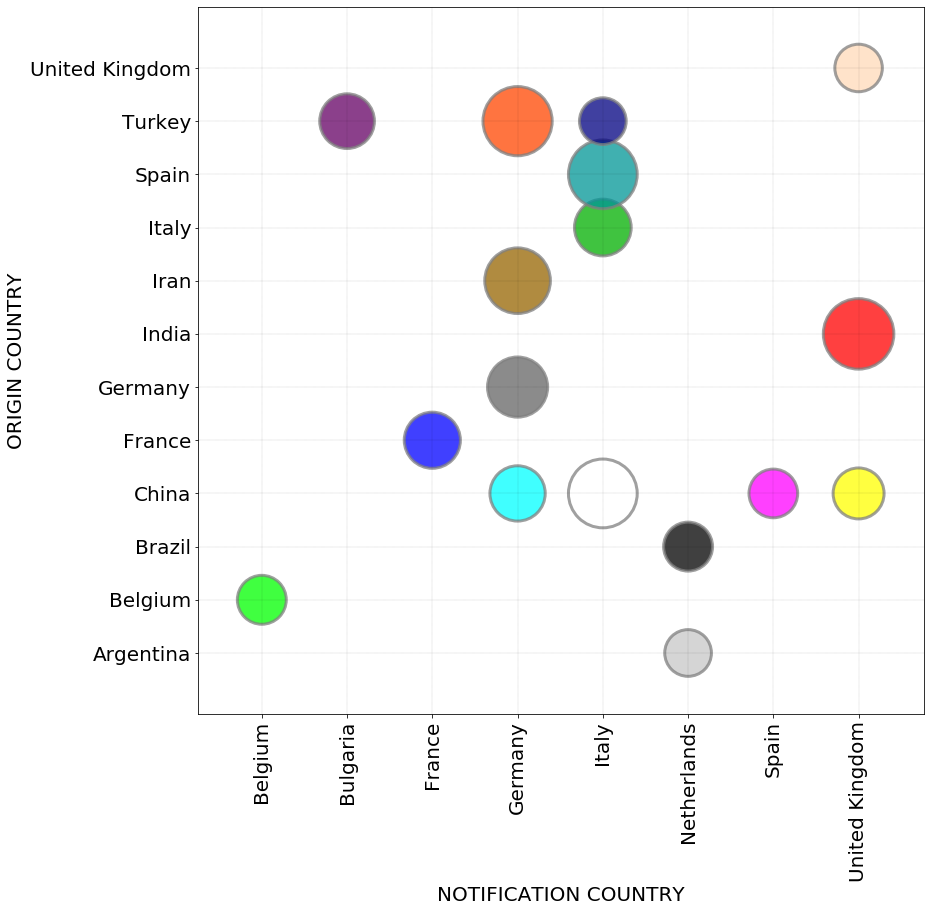

In [48]:
plt.rcParams.update({'font.size': 20})
x,y = np.meshgrid(data_crosstab.columns, data_crosstab.index)
plot_tab = data_crosstab*4
fig = plt.figure(figsize=[13,13])
plt.scatter(x=x.flatten(), y=y.flatten(), s=plot_tab.values.flatten(),c=C/255.0,alpha=0.75,edgecolors="grey",linewidth=3)
plt.grid(ls = "--", zorder = 1,linewidth=0.1, color = 'k')
plt.margins(.1)
plt.xticks(rotation=90)
plt.xlabel("NOTIFICATION COUNTRY")
plt.ylabel("ORIGIN COUNTRY")
plt.show()

# Grafo dirigido

In [ ]:
countries=data[['COUNT_ORIGEN','COUNT_DESTIN','COUNT_CONCERN']]

In [12]:
G=nx.DiGraph()
for index, row in countries.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    G.add_edge(i,j)
                    
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            G.add_edge(j,k)     
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            G.add_edge(i,k)              

## Metricas del grafo

In [13]:
print(G.nodes())
len(G.nodes())

['Romania', 'France', 'Belgium', 'Germany', 'Denmark', 'Croatia', 'Poland', 'Italy', 'Andorra', 'Spain', 'Turkey', 'Ukraine', 'Vietnam', 'Netherlands', 'United States', 'Bulgaria', 'Estonia', 'Finland', 'Slovakia', 'China', 'Czech Republic', 'Sweden', 'Thailand', 'United Kingdom', 'India', 'Norway', 'Philippines', 'Austria', 'Slovenia', 'Canada', 'Greenland', 'Brazil', 'Uruguay', 'San Marino', 'New Zealand', 'Luxembourg', 'Antigua and Barbuda', 'Bahamas', 'Ghana', 'Guernsey', 'Jersey', 'Mauritius', 'United Arab Emirates', 'Azerbaijan', 'Georgia', 'Uganda', 'Hungary', 'Sudan', 'Greece', 'Egypt', 'Switzerland', 'Ecuador', 'Portugal', 'Lithuania', 'Myanmar', 'Morocco', 'Mauritania', 'South Korea', 'Latvia', 'Ireland', 'Taiwan', 'South Africa', 'Malta', 'Kenya', 'Argentina', 'Lebanon', 'Chile', 'Hong Kong', 'Nigeria', 'Panama', 'Bolivia', 'Bahrain', 'Israel', 'Kazakhstan', 'Russia', 'Monaco', 'Pakistan', 'Dominican Republic', 'Grenada', 'El Salvador', 'Honduras', 'Iceland', 'Namibia', 'Gib

222

In [14]:
print(G.edges())
len(G.edges())

[('Romania', 'France'), ('Romania', 'Italy'), ('Romania', 'Latvia'), ('Romania', 'Croatia'), ('Romania', 'Cyprus'), ('Romania', 'Iran'), ('Romania', 'New Zealand'), ('Romania', 'Switzerland'), ('Romania', 'Austria'), ('Romania', 'Netherlands'), ('Romania', 'United States'), ('Romania', 'Ireland'), ('Romania', 'United Kingdom'), ('Romania', 'Belgium'), ('Romania', 'Denmark'), ('Romania', 'Germany'), ('Romania', 'Hungary'), ('Romania', 'Luxembourg'), ('Romania', 'Poland'), ('Romania', 'Bulgaria'), ('Romania', 'Czech Republic'), ('Romania', 'Ukraine'), ('Romania', 'Hong Kong'), ('Romania', 'Canada'), ('Romania', 'Taiwan'), ('Romania', 'Ghana'), ('Romania', 'Philippines'), ('Romania', 'Thailand'), ('Romania', 'Turkey'), ('Romania', 'Greece'), ('Romania', 'Albania'), ('Romania', 'Andorra'), ('Romania', 'Belarus'), ('Romania', 'Bosnia and Herzegovina'), ('Romania', 'Kosovo'), ('Romania', 'Liechtenstein'), ('Romania', 'Moldova'), ('Romania', 'Monaco'), ('Romania', 'Montenegro'), ('Romania', '

7092

In [15]:
nx.is_strongly_connected(G)

False

In [16]:
nx.is_weakly_connected(G)

True

In [17]:
for i in G.degree():
    print(i)

('Romania', 167)
('France', 328)
('Belgium', 311)
('Germany', 285)
('Denmark', 235)
('Croatia', 155)
('Poland', 242)
('Italy', 296)
('Andorra', 97)
('Spain', 298)
('Turkey', 134)
('Ukraine', 126)
('Vietnam', 85)
('Netherlands', 334)
('United States', 203)
('Bulgaria', 157)
('Estonia', 152)
('Finland', 206)
('Slovakia', 183)
('China', 187)
('Czech Republic', 202)
('Sweden', 201)
('Thailand', 92)
('United Kingdom', 307)
('India', 149)
('Norway', 192)
('Philippines', 67)
('Austria', 194)
('Slovenia', 175)
('Canada', 127)
('Greenland', 36)
('Brazil', 74)
('Uruguay', 51)
('San Marino', 65)
('New Zealand', 67)
('Luxembourg', 161)
('Antigua and Barbuda', 10)
('Bahamas', 29)
('Ghana', 62)
('Guernsey', 64)
('Jersey', 35)
('Mauritius', 50)
('United Arab Emirates', 174)
('Azerbaijan', 49)
('Georgia', 57)
('Uganda', 39)
('Hungary', 247)
('Sudan', 30)
('Greece', 184)
('Egypt', 95)
('Switzerland', 199)
('Ecuador', 42)
('Portugal', 201)
('Lithuania', 145)
('Myanmar', 23)
('Morocco', 86)
('Mauritania'

In [18]:
nx.density(G)

0.14455179161061513

In [ ]:
# Si es strongly conected
nx.diameter(G)

In [19]:
degree_centrality = nx.degree_centrality(G)
for key, value in sorted(degree_centrality.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

São Tomé and Príncipe: 0.004524886877828055
East Timor: 0.004524886877828055
US Virgin Islands: 0.004524886877828055
Solomon Islands: 0.004524886877828055
North Korea: 0.004524886877828055
Wallis and Futuna: 0.004524886877828055
Tonga: 0.004524886877828055
Saint Vincent and the Grenadines: 0.00904977375565611
Anguilla: 0.00904977375565611
Dominica: 0.00904977375565611
French Guiana: 0.00904977375565611
Saint Pierre and Miquelon: 0.013574660633484163
Åland Islands: 0.013574660633484163
Eritrea: 0.013574660633484163
El Salvador: 0.01809954751131222
Guyana: 0.01809954751131222
Saint Barthélemy: 0.022624434389140274
Comoros: 0.022624434389140274
Fiji: 0.022624434389140274
Turks and Caicos Islands: 0.022624434389140274
Tajikistan: 0.022624434389140274
Botswana: 0.022624434389140274
Saint Kitts and Nevis: 0.027149321266968326
Saint Lucia: 0.027149321266968326
Vanuatu: 0.027149321266968326
Somalia: 0.027149321266968326
Mayotte: 0.027149321266968326
Papua New Guinea: 0.031674208144796386
Sint 

In [27]:
degree_centrality = nx.in_degree_centrality(G)
for key, value in sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True):
    print("%s: %s" % (key, value))

Netherlands: 0.7647058823529412
Spain: 0.7511312217194571
France: 0.7285067873303168
United Kingdom: 0.6968325791855204
Italy: 0.6923076923076924
Belgium: 0.6877828054298644
Germany: 0.6877828054298644
Hungary: 0.6063348416289593
Portugal: 0.5701357466063349
Denmark: 0.5475113122171946
Sweden: 0.5429864253393666
Czech Republic: 0.5294117647058824
Slovenia: 0.5248868778280543
Switzerland: 0.5203619909502263
Greece: 0.5158371040723982
Finland: 0.5113122171945702
United Arab Emirates: 0.5113122171945702
Slovakia: 0.5067873303167422
Austria: 0.5067873303167422
Ireland: 0.5067873303167422
Poland: 0.49321266968325794
Norway: 0.4886877828054299
Cyprus: 0.4796380090497738
Luxembourg: 0.4705882352941177
Malta: 0.4479638009049774
Croatia: 0.44343891402714936
Estonia: 0.44343891402714936
Romania: 0.416289592760181
United States: 0.39366515837104077
Bulgaria: 0.39366515837104077
Lithuania: 0.3800904977375566
Latvia: 0.37556561085972856
Russia: 0.33484162895927605
Iceland: 0.3257918552036199
Hong K

In [30]:
degree_centrality = nx.out_degree_centrality(G)
for key, value in sorted(degree_centrality.items(), key=lambda item: item[1],reverse = True):
    print("%s: %s" % (key, value))

France: 0.7556561085972852
Netherlands: 0.746606334841629
Belgium: 0.7194570135746607
United Kingdom: 0.6923076923076924
Italy: 0.6470588235294118
China: 0.6199095022624435
Germany: 0.6018099547511313
Poland: 0.6018099547511313
Spain: 0.5972850678733033
United States: 0.5248868778280543
Denmark: 0.5158371040723982
Hungary: 0.5113122171945702
India: 0.49321266968325794
Japan: 0.47511312217194573
Hong Kong: 0.4298642533936652
Finland: 0.4208144796380091
Ireland: 0.416289592760181
Czech Republic: 0.38461538461538464
Norway: 0.3800904977375566
Switzerland: 0.3800904977375566
Austria: 0.37104072398190047
Sweden: 0.36651583710407243
Turkey: 0.3438914027149322
Romania: 0.3393665158371041
Portugal: 0.3393665158371041
Canada: 0.3257918552036199
Slovakia: 0.3212669683257919
Bulgaria: 0.31674208144796384
Greece: 0.31674208144796384
Malta: 0.31221719457013575
Ukraine: 0.27601809954751133
United Arab Emirates: 0.27601809954751133
Lithuania: 0.27601809954751133
Latvia: 0.27601809954751133
Egypt: 0.2

In [ ]:
nx.shortest_path(G, 'Saint Pierre and Miquelon', 'Tajikistan')

In [ ]:
nx.shortest_path(G, 'Spain', 'United Kingdom')

In [ ]:
nx.shortest_path(G, 'Israel', 'Pakistan')

In [12]:
eigenvector_centrality = nx.eigenvector_centrality(G)
for key, value in sorted(eigenvector_centrality.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

Papua New Guinea: 1.77291983771565e-21
Solomon Islands: 1.77291983771565e-21
Malawi: 1.77291983771565e-21
Fiji: 1.77291983771565e-21
North Korea: 1.77291983771565e-21
Tonga: 1.77291983771565e-21
Botswana: 1.77291983771565e-21
Eritrea: 0.0010712712806572287
Saint Vincent and the Grenadines: 0.0025453369285342105
El Salvador: 0.002623685086083667
US Virgin Islands: 0.002623685086083667
Dominica: 0.002623685086083667
São Tomé and Príncipe: 0.002654576295218369
Wallis and Futuna: 0.002654576295218369
Laos: 0.002659090145019705
East Timor: 0.0027165236841448725
Nicaragua: 0.0036781255987349123
Saint Pierre and Miquelon: 0.004193158277649522
Vanuatu: 0.004439316948835947
Saint Kitts and Nevis: 0.004564481868529215
Saint Lucia: 0.004564481868529215
Turks and Caicos Islands: 0.004564481868529215
Tajikistan: 0.004900714334766928
Comoros: 0.004903154038496419
French Guiana: 0.004903154038496419
Bolivia: 0.004961782785236759
Puerto Rico: 0.0050854833561655285
Anguilla: 0.005164087790919875
Guyana

In [14]:
betweenness_centrality = nx.betweenness_centrality(G)
for key, value in sorted(betweenness_centrality.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

Sudan: 0.0
Grenada: 0.0
El Salvador: 0.0
Honduras: 0.0
Togo: 0.0
Ethiopia: 0.0
Iraq: 0.0
Saint Pierre and Miquelon: 0.0
Curaçao: 0.0
Saint Helena: 0.0
Guatemala: 0.0
Papua New Guinea: 0.0
West Bank and Gaza Strip: 0.0
Saint Barthélemy: 0.0
Libya: 0.0
Macao: 0.0
Falkland Islands: 0.0
Haiti: 0.0
Jamaica: 0.0
Saint Kitts and Nevis: 0.0
Saint Lucia: 0.0
Saint Vincent and the Grenadines: 0.0
Paraguay: 0.0
Martinique: 0.0
São Tomé and Príncipe: 0.0
Mozambique: 0.0
Norfolk Island: 0.0
Åland Islands: 0.0
Burundi: 0.0
Rwanda: 0.0
East Timor: 0.0
Zambia: 0.0
Zimbabwe: 0.0
Armenia: 0.0
Djibouti: 0.0
Turkmenistan: 0.0
Central African Republic: 0.0
Venezuela: 0.0
Laos: 0.0
Guadeloupe: 0.0
Vanuatu: 0.0
Nepal: 0.0
Aruba: 0.0
Puerto Rico: 0.0
Réunion: 0.0
US Virgin Islands: 0.0
Swaziland: 0.0
Comoros: 0.0
Yemen: 0.0
Solomon Islands: 0.0
Malawi: 0.0
Fiji: 0.0
Turks and Caicos Islands: 0.0
Somalia: 0.0
Eritrea: 0.0
Tajikistan: 0.0
Netherlands Antilles: 0.0
Anguilla: 0.0
Dominica: 0.0
French Guiana: 0.0


In [195]:
nx.average_clustering(G)

0.7895095014318582

In [197]:
clustering= nx.clustering(G)
for key, value in sorted(clustering.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

São Tomé and Príncipe: 0
East Timor: 0
US Virgin Islands: 0
Solomon Islands: 0
North Korea: 0
Wallis and Futuna: 0
Tonga: 0
Netherlands: 0.22302852197742762
France: 0.22438965117583282
United Kingdom: 0.24336207632545034
Belgium: 0.24905350307871527
Spain: 0.2600484864962842
Italy: 0.2665770918027516
Germany: 0.28493011498810467
Hungary: 0.32975703155948766
Poland: 0.3404580940262063
Denmark: 0.3680340133571767
United States: 0.3999216991289028
Portugal: 0.41558927769180853
China: 0.4194106452915057
Ireland: 0.42459779026943206
Finland: 0.42839828897338406
Sweden: 0.4305215872223609
Switzerland: 0.43159127954360227
Czech Republic: 0.4335952945828391
Norway: 0.4360258304602419
United Arab Emirates: 0.4465262034937992
Turkmenistan: 0.46147540983606555
Greece: 0.4619808116322031
Slovakia: 0.46330441070137385
Austria: 0.46434125154163763
Slovenia: 0.477127414145409
Malta: 0.4909858348833882
Cyprus: 0.5076962544894817
Luxembourg: 0.5091149890931754
Hong Kong: 0.5165083840332394
India: 0.518

In [15]:
closeness_centrality = nx.closeness_centrality(G)
for key, value in sorted(closeness_centrality.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

Papua New Guinea: 0.0
Solomon Islands: 0.0
Malawi: 0.0
Fiji: 0.0
North Korea: 0.0
Tonga: 0.0
Botswana: 0.0
Eritrea: 0.33425043770890656
El Salvador: 0.41921746073995203
Dominica: 0.41921746073995203
Nicaragua: 0.42010002381519407
US Virgin Islands: 0.4205688699118639
Saint Vincent and the Grenadines: 0.4209863107852683
Åland Islands: 0.42144872110414816
Uganda: 0.4236677522552382
Kyrgyzstan: 0.42638357117995124
Saint Pierre and Miquelon: 0.42729659809896614
São Tomé and Príncipe: 0.4286223163569847
Wallis and Futuna: 0.4286223163569847
Vanuatu: 0.4291344329294993
Turks and Caicos Islands: 0.4291344329294993
Saint Kitts and Nevis: 0.4300592916211577
Saint Lucia: 0.4300592916211577
Laos: 0.43192102015631423
Jamaica: 0.432857942108931
Comoros: 0.43474403335995027
Bolivia: 0.4356932561402122
Puerto Rico: 0.4356932561402122
East Timor: 0.4360443478090537
French Guiana: 0.4360443478090537
Tajikistan: 0.4366466330683089
Mayotte: 0.43760419147416046
Burkina Faso: 0.4395319632427691
Niger: 0.44

In [16]:
weakly = nx.weakly_connected_components(G)

In [213]:
[len(c) for c in sorted(nx.weakly_connected_components(G),
                      key=len, reverse=True)]

[222]

In [17]:
weakly = nx.number_weakly_connected_components(G)

In [18]:
weakly

1

In [19]:
nx.average_shortest_path_length(G)

1.7583669642493172

In [ ]:
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

In [ ]:
# Si es strongly conected
nx.eccentricity(G)

## Dibujo del grafo sin especificar posiciones

In [1]:
#Para un mejor dibujo ver el notebook "grafo mapa mundial"

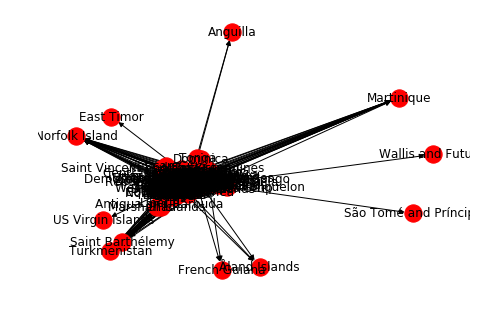

In [29]:
nx.draw(G,with_labels=True)  